Перед нами данные пациентов с показателями, которые определяют работу печени. На примере данного датасета проверим несколько гипотез.

* Age of the patient - возраст пациента;
* Gender of the patient - пол пациента;
* Total Bilirubin - общий билирубин в мг/дл;
* Direct Bilirubin - конъюгированный билирубин в мг/дл;
* Alkaline Phosphotase - щелочная фосфатаза;
* Alamine Aminotransferase - Аламиноаминотрансфераза;
* Aspartate Aminotransferase - Аспартатаминотрансфераза;
* Total Protiens - количество белков;
* Albumin - альбумин;
* Albumin and Globulin Ratio - соотношение альбуминов и глобулинов;
* Dataset - отсутствие или наличие заболевания (1 - пациент с заболеванием печени, 0 - без заболевания)

In [102]:
import pandas as pd 
import scipy as sc 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [103]:
liver = pd.read_csv('indian_liver_patient.csv')
liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Составим описательную статистику

In [104]:
liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Возьмем некую выборку из генеральной совокупности, например, отдельно мужчин и женщин с показателями щелочной фосфатазы. Но сначала проверим показатель Alkaline_Phosphotase на наличие выбросов, которые могут повлиять на критерий проверки гипотезы.

<AxesSubplot:>

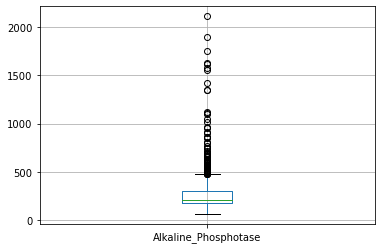

In [105]:
liver.boxplot(column=['Alkaline_Phosphotase'])

Есть много выбросов больше 500, когда значение 75-ого процентиля состовляет 298. Удалим все значения, превышающие 500

In [106]:
liver = liver.drop(liver[liver['Alkaline_Phosphotase'] > 500].index)

Отберем показетели щелочной фосфатазы у отдельно мужчин и женщин и сделаем их графики распределения.

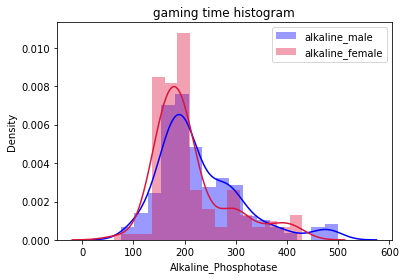

In [107]:
alkaline_male = liver.query('Gender == "Male"')['Alkaline_Phosphotase']
alkaline_female = liver.query('Gender == "Female"')['Alkaline_Phosphotase']
sns.distplot(alkaline_male, color='blue', label='alkaline_male')
sns.distplot(alkaline_female, color='crimson', label='alkaline_female')
plt.title('gaming time histogram')
plt.legend()
plt.show()

Чтобы проверять гипотезы, нужно проверить выборки на нормальность с помошью критерия normaltest. Нулевая гипотеза: наши выборки нормально распределены. Уровень значимости для всех гипотез установим как 0,05.

In [108]:
sc.stats.normaltest(alkaline_male)

NormaltestResult(statistic=78.13803388570524, pvalue=1.0778083115178903e-17)

In [109]:
sc.stats.normaltest(alkaline_female)

NormaltestResult(statistic=30.714636290672704, pvalue=2.139939388757125e-07)

p-value слишком малы, поэтому отвергаем гипотезу о нормальности распределения наших выборок. Поэтому используем непараметрический критерий проверки следующей гипотезы. 

Выдвигаем нулевую гипотезу о том, что пол не связан с показателем Alkaline_Phosphotase и проверяем, насколько гипотеза верна. Если гипотеза неверна, мы отвергаем её, и это значит, что связь между переменными есть. Так на входе 2 выборки, проверим гипотезу с помощью двухвыборочного непараметричесого критерия Манна-Уитни

In [110]:
sc.stats.mannwhitneyu(alkaline_male, alkaline_female)

MannwhitneyuResult(statistic=20782.5, pvalue=0.0030710944672364283)

p-value меньше уровня значимости, поэтому мы принимаем отвергаем гипотезу о том, что пол не связан с показателем Alkaline_Phosphotase. По графику так же можно заметить что в основном у женщин этот показатель несколько выше, чем у мужчин